## 2. Hypothesis Testing

### 2.1. Introduction to Hypothesis Testing

Use statistical tests to make inferences from the data. 

With **inferential statistics**, we try to make conclusions for the whole **population** based on our **sample data**. The sample data is nothing but a random subset of a larger set of data called the population. 

We make inferences based on these sample statistics because they tell us if the pattern we found is real or due to chance alone.

Two types of inferential statistics:

-   **Estimation** – use the statistics obtained from a sample to estimate the parameters of a population.
-   **Hypothesis Testing** – use the statistics obtained from a sample to say whether a particular assumption about the population parameter is correct or not.

### 2.2. Hypothesis Testing

**hypothesis** is a statement about the population represented by some numerical value. 

**Parameters** are numbers that summarize the data for the whole population, whereas **statistics** are the numbers that summarize the data for a sample.

The best way to determine if a hypothesis is correct is to test the entire population, but this is often is not possible in the real world. For example, we want to verify the average lifetime of a product manufactured by a factory. For this, we will have to measure the lifetime of all the products produced, which is impractical. Instead, what we do is, we find the average lifetime for a small sample, and if it is statistically different from our hypothesis, we reject the hypothesis.

### 2.3. Steps

Fundamental steps in hypothesis testing:

#### 2.3.1 **Setup two hypotheses** 

null hypothesis and the alternative hypothesis. 

The alternative hypothesis stipulates the value of a population parameter and is denoted by $H_1$ or sometimes $H_A$. This value is often based on past analysis, knowledge or observed differences that require statistical testing. 

The null hypothesis states that the stated observation is not real or significant. It can be informally interpreted as the opposite of the alternative hypothesis, so rejecting it signifies that the alternative hypothesis is statistically likely. It is usually denoted by $H_0$.

#### 2.3.2  **Set up a significance level $\alpha$** 

This step involves setting a threshold for making decisions about the null hypothesis. The **significance level** is the probability of rejecting the null hypothesis given it is true, so we want this to be low. **The most commonly used significance level is 0.05** , mainly out of convention.

#### 2.3.3 **Calculate a test statistic**

The test statistic is a quantity we can calculate from the sample data.

We can interpret the value of the test statistic itself to reject or fail to reject the null hypothesis based on a rejection region or we can use the test statistic to calculate a $p$-value and use the $p$-value to reject or fail to reject the null hypothesis.

**$p$-value** 
  
A $p$-value is calculated from the test statistic; it is the probability of finding data as extreme or more extreme than what we have observed, given that the null hypothesis is true. In other words, a $p$-value can be used to answer this question: *If the null hypothesis is true, is my data unusual?* When a $p$-value is small, the answer is "*yes*". And when the answer is "*yes*", we are generally inclined to take this as evidence against the null hypothesis.

This is another useful interpretation of $p$-value:

*If $W$ is a test statistic, the $p$-value, or attained significance level, is the smallest level of significance $\alpha$ for which the observed data indicate that the null hypothesis should be rejected.*

A $p$-value is **NOT**:

- <font color='red'>The probability that the null hypothesis is true</font>

- <font color='red'>The probability that the data were produced by chance alone</font>

Be wary of papers discussing "highly" or "extremely" significant results based on $p$-values (for more info see [p-hacking](https://en.wikipedia.org/wiki/Data_dredging)) as well as studies using $p$-values as inputs to subsequent computations or tests

**a rejection region is calculated**    

Instead of using a $p$-value you can use a rejection region. A rejection region is an area on the number line bounded by **critical values** where the test statistic is unlikely to lie. Precisely, the probability of the test statistic lying in these regions is equal to the significance level. These critical values are calculated based on the test statistic and the significance level. These regions are gray in the image below. 

<img src="images/one_and_two_sided_tests.jpeg" width='900px'/>

Depending on the type of test, the regions are one-sided/one-tailed (only on the negative or positive side of the number line with a single critical value) or two-sided/two-tailed (two regions on both sides of the number line with a lower and upper critical value) read more about the them [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/).

#### 2.3.4 **Make a decision** 

Depending on the $p$-values or rejection regions, we decide to retain the null hypothesis or discard it. If the $p$-value is less than the significance level or the test statistic lies in the rejection region the null hypothesis is rejected.

#### 2.3.5 **State an initial conclusion** 

This is based on whether you fail to reject or reject the null hypothesis. A rejection of your null hypothesis acts as statistical support for your alternative hypthesis, however, this does not **prove** that the alternative hypothesis is true. **Remember the null hypothesis is never accepted!**

#### 2.3.6 **State an overall conclusion** 

This should be expressed in terms of the **original claim**. **Not** in terms of the null hypothesis or alternative hypothesis. The original claim is about the general insight that these numbers give you. For instance, the original claim could be that a drug is an effective cure of a symptom.

## 3. Hypothesis Testing in Python using Hollywood Movies Dataset

Data: [IMDB dataset from Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data/data).


In [4]:
import numpy as np
import pandas as pd

# imdb_csv_url = "https://stats-lab-data.surge.sh/IMDB-Movie-Data.csv"
imdb_csv_url = "./data/IMDB-Movie-Data.csv"
imdb_df = pd.read_csv(imdb_csv_url)
imdb_df = imdb_df.dropna()  # Drop rows with missing values
imdb_df.head(n=3)  # View the first few rows of the dataframe to see how it looks

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   

                                         Description            Director  \
0  A group of intergalactic criminals are forced ...          James Gunn   
1  Following clues to the origin of mankind, a te...        Ridley Scott   
2  Three girls are kidnapped by a man with a diag...  M. Night Shyamalan   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0

### 3.1. Statistical tests: $Z$-test $\&$ $T$-test.

**The $z$-test and the $t$-test are used when our hypothesis can be proved by comparing population parameters to sample values, e.g., mean** 

Both the $t$-test and the $z$-test assume that the population is **normally distributed.** 

- If the population has a non-normal distribution then the sample size must be large enough such that the distribution of sample means becomes a normal distribution by Central Limit Theorem (sample size $>= 30$ [generally](https://www.dummies.com/education/math/statistics/the-central-limit-theorem-whats-large-enough/)).

**one sample tests**: comparing the sample mean with the population mean.

**two sample tests**: test whether the means from the two samples are statistically different or not.

区别：
- **t-test**: used when the population parameters (mean and standard deviation) are not known.
- **z-test**: used when the population parameters (mean and standard deviation) are known.

#### 3.1.1 One sample $z$-test example

Note:
- **one sample**: comparing the sample mean with the population mean.
- **z-test**: used when the population parameters (mean and standard deviation) are known.

The z test test statistic value is is called the $z$-score and is calculated by:

$$z=\frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$

where ($x$) – sample mean, ($\mu$) – population mean, ($\sigma$) – standard deviation of the population, ($n$) – sample size. 

**if there is any significant difference in the `Metascore` received by the movies released in the `year` 2015.**

**2015 年上映的电影的 Metascore 和全体电影比起来，是否存在显着差异**

- $H_A$: In all years, there is a significant difference in the `Metascore` ratings of movies released in the `year` $2015$.

- $H_0$: In all years, there is no significant difference in the `Metascore` ratings of movies released in the `year` $2015$.

**Two Tail**

First, check whether the variable `Metascore` being normally distributed. 

Visualize the distribution of `Metascore` using [matplotlib](https://matplotlib.org/):

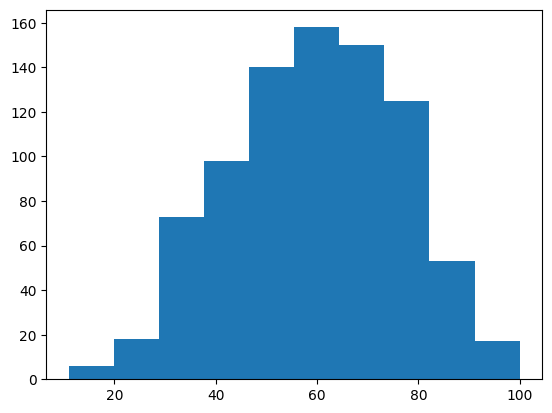

In [5]:
import matplotlib.pyplot as plt

plt.hist(imdb_df['Metascore'], bins=10)
plt.show()

Looks reasonably normally distributed, so we're good to go. 

Regardless, we can use the $z$-test since the sample size is greater than 30. 

Calculate $z-score$ $$z=\frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$

In [16]:
def manual_z_test_1samp(sample, population):
  
  n = np.shape(sample)[0]
  sample_mean = np.mean(sample)

  population_mean = np.mean(population)
  variance = np.var(population)
  
  print(f"n={n}, sample_mean={sample_mean:.5f}, population_mean={population_mean:.5f}, variance={variance:.5f}")
  
  z = (sample_mean - population_mean) / (np.sqrt(variance/(n)))
  return z

We can now use this function to find the $z$-test statistic by passing in our sample and population as inputs:

In [17]:
metascore_2015 = imdb_df[imdb_df['Year']==2015]['Metascore']
print(f"z={manual_z_test_1samp(sample=metascore_2015, population=imdb_df['Metascore']):.5f}")

n=109, sample_mean=58.65138, population_mean=59.57518, variance=287.04148
z=-0.56927


**Two Tail**

We now need to calculate the critical values corresponding to the below vertical lines areas which represent the boundries to the two tail rejection regions.

<img src="images/confidence_interval.jpeg" width='500px'/>

*⚠️If you are intrigued about why we choose to use a two tailed test or where the $0.025$s came from have a read [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/).*

For this, we need the $z$-tables. You can view the $z$-tables here: http://www.z-table.net. 

The tables give us the area under the curve to the left of a particular $z$-value. 

we require an area equal to $1−0.025=0.975$ for the upper critical value. So we look for an entry equal to or close to $0.975$ in the bottom table. 

We find it at the intersection of row and column corresponding to $1.90$ and $0.06$ respectively. 

So our upper critical value will be $1.90+0.06=1.96$.

Similarly, for the lower critical value, we look for $0.025$ in the top table and the corresponding critical value comes out to be $−1.90-0.06=−1.96$.

**our calculated test statistic $-0.56893$ lies in this range ($-1.96$ to $+1.96$), we fail to reject the null hypothesis, and cannot accept the alternate hypothesis i.e., there does not seem to be a significant difference in the Metascore ratings of movies released in the year 2015.**

Rather than performing a $z$-test "manually" we can also just use the function: [statsmodels.stats.weightstats.**ztest**](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html):

In [22]:
from statsmodels.stats import weightstats as stests

test_statistic, p_value = stests.ztest(x1=metascore_2015, value=np.mean(imdb_df['Metascore']))
print(f"test_statistic={test_statistic:.5f}")
print(f"p_value={p_value:.5f}")

test_statistic=-0.55543
p_value=0.57860


You may notice these $z$-scores are very similar but not identical. This is because in our manual function we used the actual variance of the population whereas in the library function it uses the sample variance as an estimation of the population variance.

Now instead of manually looking up the critical values in a $z$-table, let's use the python function [scipy.stats.norm.**ppf**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html): 

In [18]:
import scipy.stats as stats

def reject_or_not(test_statistic, lower_crit_val, upper_crit_val):
  print(f"test_statistic={test_statistic:.5f}, lower_critical_value={lower_crit_val:.5f}, upper_critical_value={upper_crit_val:.5f}")
  if lower_crit_val <= test_statistic <= upper_crit_val:
    print("We therefore fail to reject the null hypothesis and cannot accept the alternate hypothesis.")
  else:
    print("We therefore reject the null hypothesis and accept the alternate hypothesis.")

lower_crit_val, upper_crit_val = stats.norm.ppf(0.025), stats.norm.ppf(0.975)
reject_or_not(test_statistic, lower_crit_val, upper_crit_val)

test_statistic=-0.55543, lower_critical_value=-1.95996, upper_critical_value=1.95996
We therefore fail to reject the null hypothesis and cannot accept the alternate hypothesis.


However, we could also just use the $p$-value by itself.


In [19]:
print(f"p_value={p_value:.5f}")

p_value=0.57860


**Since the $p$-value is higher than $0.05$ ($5\%$) we fail to reject the null hypothesis, and cannot accept the alternate hypothesis i.e., there does not seem to be a significant difference in the Metascore ratings of movies released in the year 2015.**

#### 3.1.2 Two sample $t$-test example

Test

- **two sample tests**: test whether the means from the two samples are statistically different or not.

- **t-test**: used when the population parameters (mean and standard deviation) are not known.

The two sample $t$-test $t$-value can be calculated as shown below:

$$ t = \frac{\overline{x}_1 - \overline{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$ 

Everything in the formula for two sample $z$-test and $t$-test is the same, except that instead of the standard deviations $\sigma_1$ and $\sigma_2$ of the two populations, we use the standard deviations $s_1$ and $s_2$ of the two samples. 

问题：**2006和2016年发行的电影的“Metascore”的均值，是否存在统计差异** （if the there is any statistical difference in the mean `Metascore` of the movies released in the `year` $2006$ and $2016$）

- $H_A$: There is a significant difference in the `Metascore` ratings of movies released in the `year` $2006$ and $2016$.
- $H_0$: There is no significant difference in the `Metascore` ratings of movies released in the `year` $2006$ and $2016$.

Again, let's first create a function to calculate the $t$-test statistic manually:

Note:
- You can read more about the two sample $t$-test [here](https://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-t-test-for-comparing-two-means) and the two sample $z$-test [here](https://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means). 
- The generic formula that we give here for the two sample $t$-test essentially covers all cases, however, it should be noted that this formula may be simplified under certain conditions which you can research on your own if you are interested ([Google 🔍](https://www.google.com/) & [Wikipedia 📖](https://www.wikipedia.org/) are your friends).

In [24]:
def manual_t_test_ind(a, b):
  n_a = np.shape(a)[0]
  n_b = np.shape(b)[0]
  print(f"na={n_a}, a_mean={np.mean(a):.5f}, a_var={np.var(a):.5f}, nb={n_b}, b_mean={np.mean(b):.5f}, b_var={np.var(b):.5f}")
  t = (np.mean(a) - np.mean(b)) / (np.sqrt((np.var(a))/n_a + (np.var(b))/n_b))
  return t

metascore_2006 = imdb_df[imdb_df['Year']==2006]['Metascore']
metascore_2016 = imdb_df[imdb_df['Year']==2016]['Metascore']

print(f"t={manual_t_test_ind(a=metascore_2006, b=metascore_2016):.5f}")

na=41, a_mean=64.41463, a_var=191.95003, nb=198, b_mean=59.18182, b_var=315.35078
t=2.08905


For calculating the critical values we require the degree of freedom for the test, i.e., [the number of values in the final calculation of a statistic that are free to vary](http://www.animatedsoftware.com/statglos/sgdegree.htm). This is calculated as:

$$ df = \frac{ \left[\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right]^2 }{ \frac{(\frac{s_1^2}{n_1})^2}{n_1-1} + \frac{(\frac{s_2^2}{n_2})^2}{n_2-1} } $$

However if equal variances are assumed, then $$df = n_1 + n_2 - 2$$

Here is a link to an [example](https://www.statsdirect.co.uk/help/parametric_methods/utt.htm) of such a case. For our example we are not going to assume equal variances:


In [26]:
def degrees_of_freedom(a, b):
  v_1 = np.var(a)
  v_2 = np.var(b)
  n_1 = np.shape(a)[0]
  n_2 = np.shape(b)[0]

  nr = ((v_1/n_1) + (v_2/n_2))**2
  dr = (((v_1/n_1)**2)/(n_1 - 1)) + (((v_2/n_2)**2)/(n_2 - 1))
  return nr / dr

degrees_of_freedom = degrees_of_freedom(a=metascore_2006, b=metascore_2016)
print(f"degrees_of_freedom={degrees_of_freedom:.5f}")

degrees_of_freedom=70.19512


Thus the degree of freedom comes out to be $70.195120$. 

We can now find out the critical values corresponding to this degree of freedom. 

These are found out from the $t$-table (http://www.ttable.org) as approximately equal to $-1.995$ and $+1.995$ (by considering the mid value between the values corresponding to $df = 60$ and $df = 80$).

Tow tails

Since the obtained $t-statistic$ (2.08905) is outside this interval, we reject our null hypothesis and conclude that the sample means are significantly different, i.e. accept the alternate hypothesis that there does appear to be a difference in the mean Metascore of the movies released in 2006 compared to 2016.

As usual we can use inbuilt python functions to do this automatically, in this case since we have two independant samples we can use [scipy.stats.**ttest_ind**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) and [scipy.stats.t.**ppf**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html):


In [29]:
test_statistic, p_value = stats.ttest_ind(a=metascore_2006, b=metascore_2016, equal_var=False)
print(f"t-score = {test_statistic:.5f}, p-value = {p_value:.5f}")

lower_crit_val, upper_crit_val = stats.t.ppf(0.025, degrees_of_freedom), stats.t.ppf(0.975, degrees_of_freedom)

reject_or_not(test_statistic, lower_crit_val, upper_crit_val)

t-score = 2.06853, p-value = 0.04231
test_statistic=2.06853, lower_critical_value=-1.99434, upper_critical_value=1.99434
We therefore reject the null hypothesis and accept the alternate hypothesis.


If however we had dependant samples (we have repeated measurements i.e., one sample with two measurement occasions or when there are two samples that have been "matched" or "paired") we would have used [scipy.stats.**ttest_rel**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) instead of [scipy.stats.**ttest_ind**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). 

For a really good explanation of the differences between a paired and an unpaired $t$-test see [here](https://socratic.org/questions/what-is-a-paired-and-unpaired-t-test-what-are-the-differences).

We could also as usual conduct our analysis soley based on the output $p$-value:

In [30]:
print(f"p_value={p_value}")

p_value=0.04230905724549994


**The $p$-value for the above test is $0.0423$, which is less than $0.05$. Therefore we reject the null hypothesis that the two samples have the same mean, and we accept the alternate hypothesis i.e., there does appear to be a difference in the mean Metascore of the movies released in 2006 compared to 2016.**

### 3.2 Chi-squared ($\chi^2$) Tests

The tests we just discussed are used for numeric variables.

Categorical variables are variables with one or more categories with no intrinsic order. For instance, hair color is a categorical variable since there can be black, brown, blonde, red, etc. with no order to these variables.

Since the mean of a categorical variable does not make sense, these tests cannot be applied to categorical variables 

So we use chi-squared tests.

There are two main types.

- **chi-squared goodness-of-fit**
    - Pearson's $\chi^2$ goodness-of-fit test
    - a variable with more than 2 categories
    - determine if sample data matches a population
    - Read more about this test [here](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html)

- **chi-squared independence test**
    - test the statistical relationship between two categorical variables
    - The hypotheses for a Chi-squared test are as follows:
      - $H_A$: There is an association between the two variables
      - $H_0$: The two variables are independent

A chi-squared test for independence essentially compares two variables table to see if they are related by seeing whether distributions of categorical variables differ from each other.

Example: Is your hair color related to your eye color?

Cross-tabulation format:
- The data is usually displayed in a cross-tabulation format with each row representing a level (group) for one variable and each column representing a level (group) for another variable.
- The test is comparing the observed observations to the expected observations.
- ⚠️If you are confused about what a "cross-tabulation format" is, don't worry, we will go over an example in 3.2.1. 
- If, after going through this, you are still confused, here is a [short video example](https://www.khanacademy.org/math/ap-statistics/chi-square-tests/chi-square-tests-two-way-tables/v/chi-square-test-association-independence) you can come back to.

Note:
- There are a few assumptions that need to be meet in order for the results of the Chi-square test to be trusted. We won't list them but you can read them [here](https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php
).

The chi-squared independent test statistic is calculated by the following formula:

$$ \chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{i,j} - E_{i,j})^2}{E_{i,j}}$$

where 

$$ E_{i,j} = \frac{\text{row}-\text{total}_i \times \text{column}-\text{total}_j}{N} $$

and where $O_{i,j}$ is the observed count in cell $i, j$ and $E_{i,j}$ is the expected count for cell $i, j$ 
under the null hypothesis.

Degrees of freedom: $df= (r−1)(c−1)$ where $r$ is the number of rows, and $c$ is the number of columns.

- A larger chi-squared value - corresponding to a lower $p$-value - will be used to reject the null hypothesis of independence. In other words, there is a relationship
- A smalled chi-squared value - corresponding to a higher $p$-value - will not reject this claim of independence

#### 3.2.1 Chi-squared ($\chi^2$) Independence Test Example

**Lets see if there is any relationship between the `Year` and whether the `Revenue (in Millions)` column is above *$100$* by performing a chi-squared independance test.**

Firstly lets add a column `Over 100 mill revenue`:


In [31]:
imdb_df["Over 200 mill revenue"] = imdb_df["Revenue (Millions)"] > 100
imdb_df.sample(n=3)  # View 3 random rows

Rank            Title                 Genre  \
347   348  American Hustle           Crime,Drama   
506   507          Savages  Crime,Drama,Thriller   
138   139   Shutter Island      Mystery,Thriller   

                                           Description          Director  \
347  A con man, Irving Rosenfeld, along with his se...  David O. Russell   
506  Pot growers Ben and Chon face off against the ...      Oliver Stone   
138  In 1954, a U.S. marshal investigates the disap...   Martin Scorsese   

                                                Actors  Year  \
347  Christian Bale, Amy Adams, Bradley Cooper,Jenn...  2013   
506  Aaron Taylor-Johnson, Taylor Kitsch, Blake Liv...  2012   
138  Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...  2010   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  \
347                138     7.3  379088              150.12       90.0   
506                131     6.5  107960               47.31       59.0   
138                138     8.1  855604              127.97       63.0   

     Over 200 mill revenue  
347                   True  
506                  False  
138                   True

Next lets create a cross table between the approriate columns:

In [32]:
cross_table = pd.crosstab(imdb_df["Over 200 mill revenue"], imdb_df["Year"], margins=True)
cross_table

Year                   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Over 200 mill revenue                                                         
False                    27    28    29    26    35    37    40    57    62   
True                     14    16    19    19    22    20    22    27    31   
All                      41    44    48    45    57    57    62    84    93   

Year                   2015  2016  All  
Over 200 mill revenue                   
False                    84   167  592  
True                     25    31  246  
All                     109   198  838

In [33]:
years = list(cross_table.columns)[:-1]  # Lets save the year col names into a variable
years

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [34]:
observed = cross_table.iloc[0:-1, 0:-1] 
observed.index = ['False', 'True']  # Set row names
observed.columns = years  # Set columns names
observed

2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016
False    27    28    29    26    35    37    40    57    62    84   167
True     14    16    19    19    22    20    22    27    31    25    31

#### 根据各行和各列的 All，计算各 Cell 的 Expected

To get the expected counts for the cell, we need to multiply the row total for that cell by the column total for that cell and then divide by the total number of observations. 

We can quickly get the expected counts for all cells in the table by taking the row totals and column totals of the table, performing an outer product on them with the [np.**outer**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html) and dividing by the number of observations:

In [35]:
np.outer(cross_table["All"][:-1], cross_table.loc["All"][:-1])

array([[ 24272,  26048,  28416,  26640,  33744,  33744,  36704,  49728,
         55056,  64528, 117216],
       [ 10086,  10824,  11808,  11070,  14022,  14022,  15252,  20664,
         22878,  26814,  48708]])

In [41]:
# 总样本数
cross_table.iloc[-1,-1]

838

In [36]:
expected = np.outer(cross_table["All"][:-1], cross_table.loc["All"][:-1]) / cross_table.iloc[-1,-1]
expected = pd.DataFrame(expected, index=['False', 'True'], columns=years)
expected

2006       2007       2008       2009       2010       2011  \
False  28.9642  31.083532  33.909308  31.789976  40.267303  40.267303   
True   12.0358  12.916468  14.090692  13.210024  16.732697  16.732697   

            2012       2013       2014       2015        2016  
False  43.799523  59.341289  65.699284  77.002387  139.875895  
True   18.200477  24.658711  27.300716  31.997613   58.124105

In [40]:
# 每一列的总数，就是那一年的总数
expected.sum()

2006     41.0
2007     44.0
2008     48.0
2009     45.0
2010     57.0
2011     57.0
2012     62.0
2013     84.0
2014     93.0
2015    109.0
2016    198.0
dtype: float64

In [39]:
# 整个总数还是样本数
expected.sum().sum()

838.0

Lets use [scipy.stats.chi2.**ppf**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) to get a critical value instead of manually looking it up using a [Chi-square Distribution Table](https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf):

In [42]:
chi_sq_test_statistic = (((observed-expected)**2)/expected).sum().sum()
# We call .sum() twice: once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.

critical_value = stats.chi2.ppf(q=0.95, # Find the critical value for 95% confidence
                                df=10)  # df = (number of row categories - 1) * (number of column categories - 1) 
                                        #    = 1 * 10 = 10

print(f"chi_sq_test_statistic={chi_sq_test_statistic}, critical_value={critical_value}")

chi_sq_test_statistic=32.99019492051913, critical_value=18.307038053275146


Test statistic is greater than the critical value

Reject the null hypothesis and accept the alternate hypothesis
- There is enough evidence to suggest there is a relationship between the year and the number of movies with a revenue above 100 million

If you want to use the p-value you can use [scipy.stats.chi2.**cdf**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html):

In [43]:
p_value = 1 - stats.chi2.cdf(x=chi_sq_test_statistic, # Find the p-value
                             df=10)            # df = (number of row categories - 1) * (number of column categories - 1) 
                                               #    = 1 * 10 = 10
print(f"p_value={p_value}")

p_value=0.0002734211993575819


$𝑝$-value is less than 0.05

We can reject the null hypothesis and accept the alternate hypothesis. 

There is enough evidence to suggest there is a relationship between the year and the number of movies with a revenue above 100 million

As usual we can also carry out a chi-squared independence test automatically using a library function 😀 [scipy.stats.**chisquare**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) to obtain the same results:

In [44]:
chi_squared, p_value, degrees_of_freedom, expected = stats.chi2_contingency(observed=observed)
print(f"chi_squared={chi_squared}, p_value={p_value}, degrees_of_freedom={degrees_of_freedom}")

chi_squared=32.99019492051914, p_value=0.00027342119935759704, degrees_of_freedom=10


## 4. Real world application of what we have learnt

Now lets apply our new knowledge to some real world data from the Providence Police Department. 

We are going to answer two questions relating to homeless arrestees:

1. "_Are homeless inviduals who are arrested more likely to be subsequently prosecuted than non-homeless inviduals?_"

“被捕的无家可归者比非无家可归者更有可能随后受到起诉？”

2. "_Is there a difference in the average number of arresting officers for homeless versus non-homeless arrestees?_"

“无家可归者与非无家可归者的平均逮捕人数是否有差异？”

Firstly lets read in our two datasets into pandas dataframes.

In [46]:
import pandas as pd

# arrests_csv_url = "https://stats-lab-data.surge.sh/arrests_data.csv"
arrests_csv_url = "./data/arrests_data.csv"
arrests_df = pd.read_csv(arrests_csv_url)
arrests_df.head(n=2)  # We can use head to view the first couple rows for a sanity check

arrest_date  year  month                       id gender   race  \
0  2019-08-24T02:23:00.0  2019      8   pvd2218242150382148273   Male  White   
1  2019-08-24T02:02:00.0  2019      8  pvd15166785558364246202    NaN    NaN   

     ethnicity  year_of_birth  age          from_address   from_city  \
0  NonHispanic           1981   37  No Permanent Address  providence   
1          NaN           1994   25            SUMMER AVE    Cranston   

     from_state          statute_type statute_code  \
0  Rhode Island                   NaN          NaN   
1  Rhode Island  RI Statute Violation     31-11-18   

                                        statute_desc  counts    case_number  \
0                                                NaN     NaN  2019-00084142   
1  Driving after Denial, Suspension or Revocation...     1.0  2019-00084127   

     arresting_officers  
0   YGonzalez, LTaveras  
1             NManfredi

In [47]:
# cases_csv_url = "https://stats-lab-data.surge.sh/cases_data.csv"
cases_csv_url = "./data/cases_data.csv"
cases_df = pd.read_csv(cases_csv_url)
cases_df.head(n=2)  # We can use head to view the first couple rows for a sanity check

case_number                   location          reported_date  month  \
0  2019-00107747  CRANSTON ST & LINWOOD AVE  2019-10-22T02:24:00.0     10   
1  2019-00107746           ACORN & KINSLEY   2019-10-22T02:23:00.0     10   

   year         offense_desc statute_code  \
0  2019       Warrant\Capias  BWARRANT-SC   
1  2019  Motor Vehicle Theft      11-41-1   

                               statute_desc  counts reporting_officer  
0  BENCH WARRANT ISSUED FROM SUPERIOR COURT       1           ASantos  
1              LARCENY/O $1500 - AUTO THEFT       1           EChabot

### 4.1. Data Processing


Add columns in our dataframe with the relevant variables. 
- one indicating whether an arrestee has an address or is homeless
- one for whether the case went forward

Finally remove duplicate arrest records

In [48]:
from collections import Counter 

# First, we add a column to the df_arrests dataframe to indicate if a person has a from_address, an indicator of homelessness
arrests_df["is_homeless"] = arrests_df["from_address"] == "No Permanent Address"
print(Counter(arrests_df["is_homeless"]))

# Add a column for whether an arrest turned into a court case
all_cases_set = set(cases_df["case_number"])  # We use a set to ensure O(1) lookup time for `isin` 
arrests_df["became_case"] = arrests_df["case_number"].isin(all_cases_set)
print(len(arrests_df))

# Remove duplicates and repeat offenders.
arrests_df.drop_duplicates(subset=["id", "case_number", "is_homeless", "became_case", "arresting_officers"], inplace=True)
print(len(arrests_df))

arrests_df.sample(n=3)  # View a random sample of rows. Scroll right to see the new columns you created

Counter({False: 2052, True: 161})
2213
1762


arrest_date  year  month                       id  gender  \
1479  2019-08-31T13:48:00.0  2019      8  pvd13029570293091572235  Female   
1716  2019-10-19T12:39:00.0  2019     10   pvd9766528587865564869  Female   
1897  2019-10-10T22:45:00.0  2019     10   pvd2568138379307221222    Male   

       race    ethnicity  year_of_birth  age   from_address      from_city  \
1479  White  NonHispanic           1964   54  FRIENDSHIP ST     Providence   
1716  Black  NonHispanic           2000   19     WENDELL ST     Providence   
1897  Black     Hispanic           1998   21       BROAD ST  CENTRAL FALLS   

        from_state          statute_type statute_code  \
1479  Rhode Island        Warrant\Capias  BWARRANT-SC   
1716           NaN  RI Statute Violation      11-44-1   
1897           NaN  RI Statute Violation      11-44-1   

                                     statute_desc  counts    case_number  \
1479     BENCH WARRANT ISSUED FROM SUPERIOR COURT     1.0  2019-00086958   
1716  DOMESTIC-VANDALISM/MALICIOUS INJURY TO PROP     1.0  2019-00106731   
1897       VANDALISM/MALICIOUS INJURY TO PROPERTY     1.0  2019-00103394   

       arresting_officers  is_homeless  became_case  
1479      INerney, VLopez        False        False  
1716     AChin, MSheridan        False         True  
1897   LMarroquin, KMelfi        False         True

### 4.2. Testing hypothesis question 1

We can now answer the first question: _"Are homeless inviduals who are arrested more likely to be subsequently prosecuted than non-homeless inviduals?"_

### <font color='green'>Checkoff Question 1 - Hypothesis test choice 1</font>

Use the appropriate statistical test to answer this question by replacing the question marks below:

In [ ]:
import scipy.stats as stats

contingency_cross_table = pd.crosstab(arrests_df["?"], arrests_df["?"])
contingency_cross_table

In [ ]:
f_obs = np.array([contingency_cross_table.iloc[?].values,
                  contingency_cross_table.iloc[?].values])
f_obs

In [ ]:
?, ?, ?, ? = stats.?(f_obs)
print(f"The p-value is: {?:.5f}")

**Explain to your TA the results of above test and why you think we used it?**

### 4.3. Adding new `officer_cnt` column

To answer the second question we will need to know the number of officers per arrest. Lets add this.

In [ ]:
arrests_df["officer_cnt"] = arrests_df["arresting_officers"].str.strip().str.split(', ').fillna('').apply(len)
arrests_df.head()

### 4.4. Testing hypothesis question 2

We can now answer the second question: _"Is there a difference in the average number of arresting officers for homeless versus non-homeless arrestees?"_

### <font color='green'>Checkoff Question 2 - Hypothesis test choice 2</font>

Use the appropriate statistical test to answer this question by replacing the question marks below:

In [ ]:
homeless_rows = arrests_df.loc[arrests_df["?"] == ?]
non_homeless_rows = arrests_df.loc[arrests_df["?"] == ?]

?, ? = stats.?(homeless_rows["?"], non_homeless_rows["?"])

print(f"The p-value is: {?:.5f}")

**Explain the results of above test and why you think we used it?**

# 🎉 Congratulations you finished the lab 🎉